## Spaceship Titanic ##

In this Notebook the goal is to predict which passengers are transported to an alternate dimension.


**We have a test set and a training set with the following features:**

- **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
- **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- **Destination** - The planet the passenger will be debarking to.
- **Age** - The age of the passenger.
- **VIP** - Whether the passenger has paid for special VIP service during the voyage.
- **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- **Name** - The first and last names of the passenger.
- **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
predict.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
file = 'testSpace.csv'
test_set = pd.read_csv(file)

file = 'trainSpace.csv'
train_set = pd.read_csv(file)

**Let's explore the data in the datasets**

In [23]:
print(train_set.info())
print('-'*40)
print(test_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13

In [25]:
print(f'- The shape of the train set is {train_set.shape}')
print(f'- The shape of the test set is {test_set.shape}')

- The shape of the train set is (8693, 14)
- The shape of the test set is (4277, 13)


In [57]:
print('Train set')
train_set.describe()

Train set


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [59]:
print('Test set')
test_set.describe()

Test set


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [35]:
print('- First five examples of the train set:')
print('')
train_set.head()

- First five examples of the train set:



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [37]:
print('- First five examples of the test set:')
print('')
test_set.head()

- First five examples of the test set:



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


<br>
<br>  

**I'll concatenate the datasets for filling of missing values and feature engineering.** Before training predictive models I'll split them again.

In [128]:
combined_set = pd.concat([train_set, test_set], ignore_index=True)
combined_set.shape

(12970, 14)

In [44]:
combined_set.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [46]:
missing_values = combined_set.isnull().sum()
print(missing_values[missing_values>0].sort_values(ascending=False))

Transported     4277
CryoSleep        310
ShoppingMall     306
Cabin            299
VIP              296
Name             294
FoodCourt        289
HomePlanet       288
Spa              284
Destination      274
Age              270
VRDeck           268
RoomService      263
dtype: int64


<br>
<br>  

**It seems we have a significant presence of missing values in the dataset.**  
I'll explore methods to address these gaps by imputing values based on the available data. My hunch is that passengers in cryosleep wouldn’t have spent anything on amenities like room service, food court, shopping mall, spa, or VR deck. Let's check if this holds true.

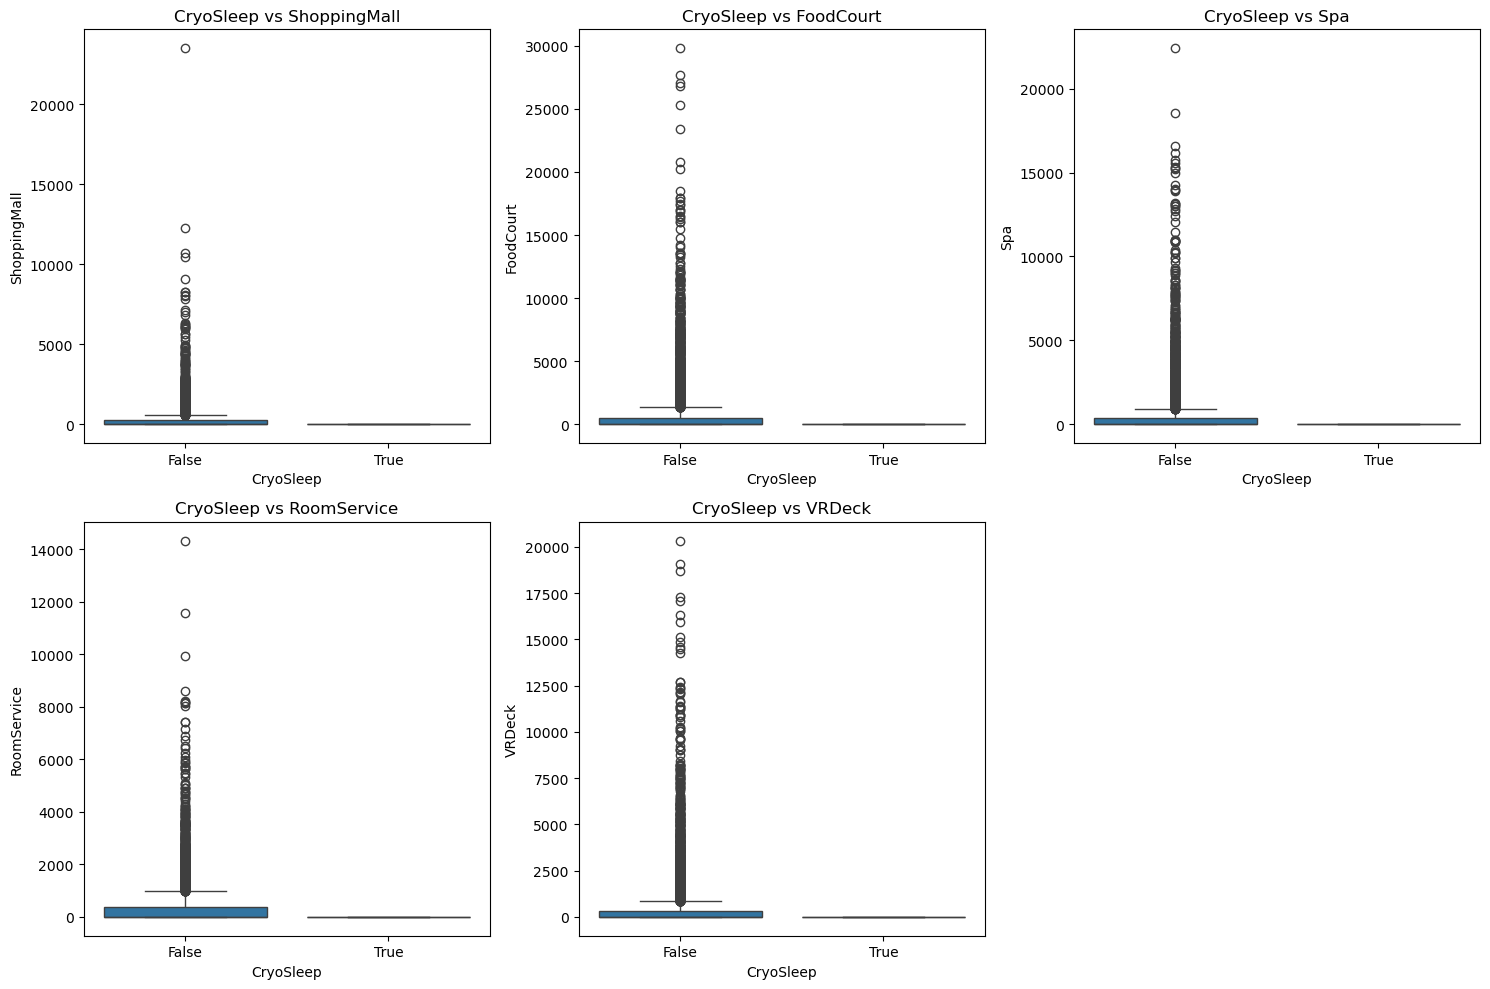

In [130]:
# Dropping NaN values before plotting
box_features = combined_set.dropna(subset=['CryoSleep', 'ShoppingMall', 'FoodCourt', 'Spa', 'RoomService', 'VRDeck'])

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x='CryoSleep', y='ShoppingMall', data=box_features)
plt.title('CryoSleep vs ShoppingMall')

plt.subplot(2, 3, 2)
sns.boxplot(x='CryoSleep', y='FoodCourt', data=box_features)
plt.title('CryoSleep vs FoodCourt')

plt.subplot(2, 3, 3)
sns.boxplot(x='CryoSleep', y='Spa', data=box_features)
plt.title('CryoSleep vs Spa')

plt.subplot(2, 3, 4)
sns.boxplot(x='CryoSleep', y='RoomService', data=box_features)
plt.title('CryoSleep vs RoomService')

plt.subplot(2, 3, 5)
sns.boxplot(x='CryoSleep', y='VRDeck', data=box_features)
plt.title('CryoSleep vs VRDeck')

plt.tight_layout()
plt.show()

<br>  

**As shown in the boxplots there is a significant connection** between the spending on amenities and the cryosleep feature.  
I'll impute the missing values based on this information.

In [132]:
missing_cryo_no_spending = combined_set[
    (combined_set['CryoSleep'].isna()) &
    (combined_set['ShoppingMall'] == 0) &
    (combined_set['FoodCourt'] == 0) &
    (combined_set['Spa'] == 0) &
    (combined_set['RoomService'] == 0) &
    (combined_set['VRDeck'] == 0)
]

count = missing_cryo_no_spending.shape[0]

print(f'There are {count} passengers that have no value for cryosleep and have no record of spending on amenities')

There are 123 passengers that have no value for cryosleep and have no record of spending on amenities


In [134]:
# Fill missing CryoSleep values with True for passengers with no spending
combined_set['CryoSleep'] = combined_set.apply(
    lambda row: True if pd.isna(row['CryoSleep']) and 
                (row['ShoppingMall'] == 0 and row['FoodCourt'] == 0 and row['Spa'] == 0 and row['RoomService'] == 0)
                else row['CryoSleep'],
    axis=1
)

# Fill the remaining missing CryoSleep values with False
combined_set['CryoSleep'] = combined_set['CryoSleep'].fillna(False)
combined_set['CryoSleep'] = combined_set['CryoSleep'].infer_objects(copy=False)

# Verify if any missing values are left in CryoSleep
missing_cryo_after_fill = combined_set['CryoSleep'].isna().sum()

print(f'There are {missing_cryo_after_fill} missing values left for the cryosleep feature')

There are 0 missing values left for the cryosleep feature


C:\Users\janne\AppData\Local\Temp\ipykernel_16264\885536002.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_set['CryoSleep'] = combined_set['CryoSleep'].fillna(False)


<br>  

**The explanation of the PassengerId feature is as follows:** "A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always."  
<br>  

This brings the possibility of creating a new feature representing the groups passengers are travelling with. By using this new feature we can also fill in some missing values for Cabin since people in the same group probably share a cabin.

In [136]:
# Extract the first four digits of PassengerId to create a GroupID
combined_set['GroupID'] = combined_set['PassengerId'].str.slice(0, 4)

# Function to fill missing Cabin values based on GroupID
def fill_cabin(group):
    if group['Cabin'].isnull().all():
        return group  # If all values are NaN, do nothing
    mode_cabin = group['Cabin'].mode()[0]  # Find the mode Cabin in the group
    group['Cabin'] = group['Cabin'].fillna(mode_cabin)  # Fill missing values with mode
    return group

# Apply the function to the Cabin column grouped by GroupID
combined_set = combined_set.groupby('GroupID', group_keys=False).apply(fill_cabin)

# Verify the result
print(combined_set[['PassengerId', 'GroupID', 'Cabin']].head(20))



   PassengerId GroupID  Cabin
0      0001_01    0001  B/0/P
1      0002_01    0002  F/0/S
2      0003_01    0003  A/0/S
3      0003_02    0003  A/0/S
4      0004_01    0004  F/1/S
5      0005_01    0005  F/0/P
6      0006_01    0006  F/2/S
7      0006_02    0006  G/0/S
8      0007_01    0007  F/3/S
9      0008_01    0008  B/1/P
10     0008_02    0008  B/1/P
11     0008_03    0008  B/1/P
12     0009_01    0009  F/1/P
13     0010_01    0010  G/1/S
14     0011_01    0011  F/2/P
15     0012_01    0012    NaN
16     0014_01    0014  F/3/P
17     0015_01    0015  F/4/P
18     0016_01    0016  F/5/P
19     0017_01    0017  G/0/P


C:\Users\janne\AppData\Local\Temp\ipykernel_16264\1258569092.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_set = combined_set.groupby('GroupID', group_keys=False).apply(fill_cabin)


In [79]:
missing_values = combined_set.isnull().sum()
print(missing_values[missing_values>0].sort_values(ascending=False))

Transported     4277
ShoppingMall     306
VIP              296
Name             294
FoodCourt        289
HomePlanet       288
Spa              284
Destination      274
Age              270
VRDeck           268
RoomService      263
Cabin            162
dtype: int64


In [138]:
# Impute the remaining missing Cabin values with the overall mode of Cabin
overall_mode_cabin = combined_set['Cabin'].mode()[0]
combined_set.fillna({'Cabin' : overall_mode_cabin}, inplace=True)

# Verify if there are any remaining missing Cabin values
remaining_missing = combined_set['Cabin'].isnull().sum()
remaining_missing


0

<br>  

**The cabin feature contains information about the deck, cabinnumber and shipside a passenger stayed on.**  
By splitting the cabin feature we can create extra features containing this information.

In [140]:
combined_set[['Deck', 'CabinNumber', 'ShipSide']] = combined_set['Cabin'].str.split('/', expand=True)

combined_set[['Deck', 'CabinNumber', 'ShipSide']].head()

,Deck,CabinNumber,ShipSide
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S


In [87]:
missing_values = combined_set.isnull().sum()
print(missing_values[missing_values>0].sort_values(ascending=False))

Transported     4277
ShoppingMall     306
VIP              296
Name             294
FoodCourt        289
HomePlanet       288
Spa              284
Destination      274
Age              270
VRDeck           268
RoomService      263
dtype: int64


<br>  

**The new features contain all the information from the cabin feature so I'll drop cabin.**

In [142]:
combined_set = combined_set.drop('Cabin', axis=1)
combined_set.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,Deck,CabinNumber,ShipSide
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,F,1,S


<br>  

**The size of the groups can be imputed from counting group id's.**  
Having a large or small group might have impact on wether a passenger was transported or not.

In [144]:
# New feature for groupsize
group_size = combined_set['GroupID'].value_counts()
combined_set['GroupSize'] = combined_set['GroupID'].map(group_size)
combined_set.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,Deck,CabinNumber,ShipSide,GroupSize
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,B,0,P,1
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,F,0,S,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,A,0,S,2
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,A,0,S,2
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,F,1,S,1


In [97]:
missing_values = combined_set.isnull().sum()
print(missing_values[missing_values>0].sort_values(ascending=False))

Transported     4277
ShoppingMall     306
VIP              296
Name             294
FoodCourt        289
HomePlanet       288
Spa              284
Destination      274
Age              270
VRDeck           268
RoomService      263
dtype: int64


<br>



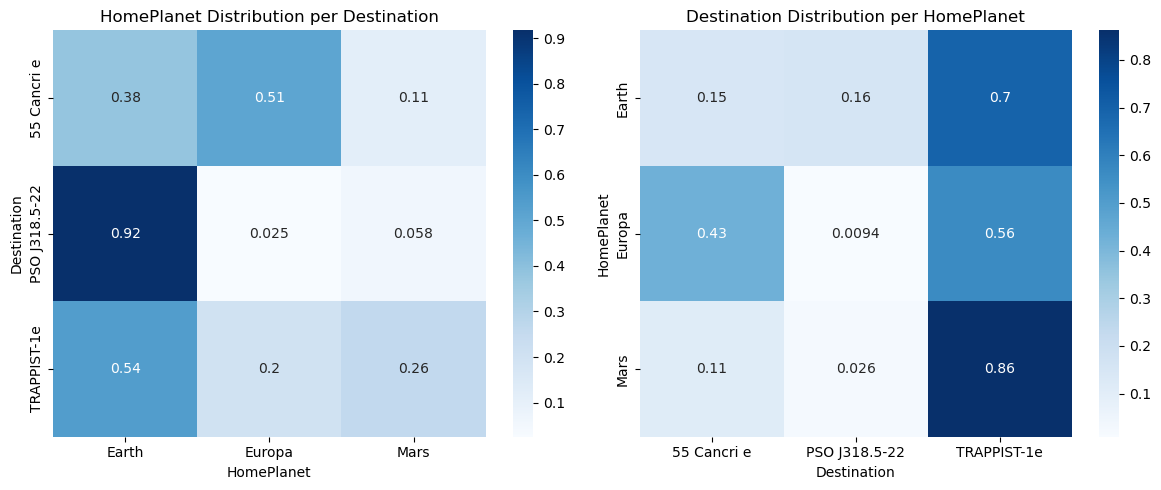

In [146]:
# Frequency distribution of HomePlanet for each Destination
homeplanet_distribution = combined_set.groupby('Destination')['HomePlanet'].value_counts(normalize=True).unstack()

# Frequency distribution of Destination for each HomePlanet
destination_distribution = combined_set.groupby('HomePlanet')['Destination'].value_counts(normalize=True).unstack()

# Visualizing the distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(homeplanet_distribution, annot=True, cmap="Blues")
plt.title('HomePlanet Distribution per Destination')

plt.subplot(1, 2, 2)
sns.heatmap(destination_distribution, annot=True, cmap="Blues")
plt.title('Destination Distribution per HomePlanet')

plt.tight_layout()
plt.show()

**It's clear there are a few high correlations** between for example "Earth" as homeplanet and "PSO J318.5-22" as destination.  
I'll impute the ones with correlation >0.5 but the other ones will need a different tactic.

In [148]:
high_corr_threshold = 0.5

# Impute missing HomePlanet based on the most common HomePlanet for each Destination with strong correlation
for destination, group in combined_set.groupby('Destination'):
    mode_homeplanet = group['HomePlanet'].mode()[0]
    if homeplanet_distribution.loc[destination, mode_homeplanet] > high_corr_threshold:
        combined_set.loc[(combined_set['HomePlanet'].isnull()) & (combined_set['Destination'] == destination), 'HomePlanet'] = mode_homeplanet

# Impute missing Destination based on the most common Destination for each HomePlanet with strong correlation
for homeplanet, group in combined_set.groupby('HomePlanet'):
    mode_destination = group['Destination'].mode()[0]
    if destination_distribution.loc[homeplanet, mode_destination] > high_corr_threshold:
        combined_set.loc[(combined_set['Destination'].isnull()) & (combined_set['HomePlanet'] == homeplanet), 'Destination'] = mode_destination

# Check for remaining missing values
missing_values = combined_set.isnull().sum()
print(missing_values[missing_values > 0].sort_values(ascending=False))


Transported     4277
ShoppingMall     306
VIP              296
Name             294
FoodCourt        289
Spa              284
Age              270
VRDeck           268
RoomService      263
HomePlanet         6
Destination        6
dtype: int64


**The remaining missing values for homeplanet and destination is a very small number.**  
Because this is a small number I'll fill them with the overall mode, this ensures the values align with the general trend of the data.

In [150]:
#Impute the remaining missing HomePlanet values with the overall mode
overall_mode_homeplanet = combined_set['HomePlanet'].mode()[0]
combined_set.fillna({'HomePlanet' : overall_mode_homeplanet}, inplace=True)

#Impute the remaining missing Destination values with the overall mode
overall_mode_destination = combined_set['Destination'].mode()[0]
combined_set.fillna({'Destination' : overall_mode_destination}, inplace=True)

missing_values = combined_set.isnull().sum()
print(missing_values[missing_values>0].sort_values(ascending=False))


Transported     4277
ShoppingMall     306
VIP              296
Name             294
FoodCourt        289
Spa              284
Age              270
VRDeck           268
RoomService      263
dtype: int64


<br>

**I'll impute the missing numerical features with the median.**

In [152]:
# Impute numerical features with the median
combined_set.fillna({'Age' : combined_set['Age'].median()}, inplace=True)
combined_set.fillna({'RoomService' : combined_set['RoomService'].median()}, inplace=True)
combined_set.fillna({'FoodCourt' : combined_set['FoodCourt'].median()}, inplace=True)
combined_set.fillna({'ShoppingMall' : combined_set['ShoppingMall'].median()}, inplace=True)
combined_set.fillna({'Spa' : combined_set['Spa'].median()}, inplace=True)
combined_set.fillna({'VRDeck' : combined_set['VRDeck'].median()}, inplace=True)

#Impute VIP with the mode
combined_set.fillna({'VIP' : combined_set['VIP'].mode()[0]}, inplace=True)

missing_values = combined_set.isnull().sum()
print(missing_values[missing_values>0].sort_values(ascending=False))

Transported    4277
Name            294
dtype: int64


C:\Users\janne\AppData\Local\Temp\ipykernel_16264\1887445489.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_set.fillna({'VIP' : combined_set['VIP'].mode()[0]}, inplace=True)


In [154]:
# I'll drop the Name feature since this is not used for training
combined_set.drop('Name', axis=1, inplace=True)

In [156]:
# Dropping GroupId, I think GroupSize holds enough information
combined_set = combined_set.drop(['GroupID'], axis=1)

In [158]:
combined_set.shape

(12970, 16)

In [120]:
combined_set.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,CabinNumber,ShipSide,GroupSize
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,1
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,2
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,2
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,1


In [160]:
combined_set.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported      object
Deck             object
CabinNumber      object
ShipSide         object
GroupSize         int64
dtype: object

In [162]:
combined_set['CabinNumber'] = combined_set['CabinNumber'].astype(int)

In [164]:
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'ShipSide']

# One-hot encoding categorical columns
combined_set_encoded = pd.get_dummies(combined_set, columns=categorical_columns, drop_first=True)

combined_set_encoded.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinNumber,GroupSize,...,Destination_TRAPPIST-1e,VIP_True,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,ShipSide_S
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,False,0,1,...,True,False,True,False,False,False,False,False,False,False
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,True,0,1,...,True,False,False,False,False,False,True,False,False,True
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,2,...,True,True,False,False,False,False,False,False,False,True
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,2,...,True,False,False,False,False,False,False,False,False,True
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,True,1,1,...,True,False,False,False,False,False,True,False,False,True


**Now the missing values have been handled I'll split the data in train and test again.**

In [166]:
#Split the dataset into training and test sets
train_set = combined_set_encoded[:len(train_set)]
test_set = combined_set_encoded[len(train_set):]


#Verify the split
print(f"Training set size: {train_set.shape}")
print(f"Test set size: {test_set.shape}")

Training set size: (8693, 24)
Test set size: (4277, 24)


In [168]:
print(train_set.info())
print('-'*40)
print(test_set.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0 to 8692
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   Age                        8693 non-null   float64
 2   RoomService                8693 non-null   float64
 3   FoodCourt                  8693 non-null   float64
 4   ShoppingMall               8693 non-null   float64
 5   Spa                        8693 non-null   float64
 6   VRDeck                     8693 non-null   float64
 7   Transported                8693 non-null   object 
 8   CabinNumber                8693 non-null   int32  
 9   GroupSize                  8693 non-null   int64  
 10  HomePlanet_Europa          8693 non-null   bool   
 11  HomePlanet_Mars            8693 non-null   bool   
 12  CryoSleep_True             8693 non-null   bool   
 13  Destination_PSO J318.5-22  8693 non-null   bool   
 1

In [172]:
train_set.loc[:,'Transported'] = train_set['Transported'].astype(bool)

In [174]:
train_set['Transported'].dtype

dtype('bool')

Now it's time to explore different predictive models and see what works best.  
I'll start with a RandomForestClassifier, I expect it will work quite well on this particular problem.

## RandomForest ##

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Separate the target variable from the features, also dropping features we won't use
X = train_set.drop(['PassengerId', 'Transported'], axis=1)
y = train_set['Transported']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForest model 
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
yhat = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)

print(f'The first accuracy score of the RandomForestClassifier model is {accuracy}')


The first accuracy score of the RandomForestClassifier model is 0.7837837837837838


<br>  

**To improve the accuracy we can search for better hyperparameters using GridsearchCV.**

In [181]:
from sklearn.model_selection import GridSearchCV
import time

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}


# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Run GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
start_time_grid = time.time()
grid_search.fit(X_train, y_train)
end_time_grid = time.time()


# Capture the best parameters and the best score 
best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_
time_taken_grid = end_time_grid - start_time_grid


print("GridSearchCV Best Parameters:", best_params_grid)
print("GridSearchCV Best Score:", best_score_grid)
print("GridSearchCV Time Taken:", time_taken_grid, "seconds")

Fitting 3 folds for each of 216 candidates, totalling 648 fits


C:\Users\janne\Downloads\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
183 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\janne\Downloads\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\janne\Downloads\Anaconda\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\janne\Downloads\Anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\U

GridSearchCV Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
GridSearchCV Best Score: 0.8097497842968077
GridSearchCV Time Taken: 227.73091793060303 seconds


In [187]:
# Tuned model with hyperparameters found by gridsearchCV
RF_model = RandomForestClassifier(**best_params_grid, random_state=42)

# Training on training data
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=300, random_state=42)

In [185]:
test_set.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinNumber,GroupSize,...,Destination_TRAPPIST-1e,VIP_True,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,ShipSide_S
8693,0013_01,27.0,0.0,0.0,0.0,0.0,0.0,NaN,3,1,...,True,False,False,False,False,False,False,True,False,True
8694,0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,NaN,4,1,...,True,False,False,False,False,False,True,False,False,True
8695,0019_01,31.0,0.0,0.0,0.0,0.0,0.0,NaN,0,1,...,False,False,False,True,False,False,False,False,False,True
8696,0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,NaN,1,1,...,True,False,False,True,False,False,False,False,False,True
8697,0023_01,20.0,10.0,0.0,635.0,0.0,0.0,NaN,5,1,...,True,False,False,False,False,False,True,False,False,True


In [191]:
X_test_final = test_set.drop(['PassengerId', 'Transported'], axis=1)
X_test_final = X_test_final[X_train.columns]

RF_predictions = RF_model.predict(X_test_final)

submission_RF = pd.DataFrame({
    'PassengerId': test_set['PassengerId'],
    'Transported': RF_predictions
})

# Save the submission file
submission_RF.to_csv('submission_RF.csv', index=False)

print('Submission file succesfuly created')

Submission file succesfuly created


In [193]:
submission_RF

,PassengerId,Transported
8693,0013_01,True
8694,0018_01,False
8695,0019_01,True
8696,0021_01,True
8697,0023_01,True
...,...,...
12965,9266_02,True
12966,9269_01,False
12967,9271_01,True
12968,9273_01,True


**The RandomForestClassifier achieved a public leaderboard score of 0.79775** This is a pretty good score but we can go higher.

## XGBoost ##  

In [202]:
pip install xgboost

In [204]:
from xgboost import XGBClassifier

# Initialize XGBoost model
XGB_model = XGBClassifier(random_state=42, n_jobs=-1)
XGB_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [206]:
XGB_model.fit(X_train, y_train)

yhat_XGB = XGB_model.predict(X_test)
accuracy = accuracy_score(y_test, yhat_XGB)

print(f'The first accuracy score of XGBoost is {accuracy}')

The first accuracy score of XGBoost is 0.7958596894767107


In [208]:
# Let's see what the score will be on the Kaggle leaderboard without hyperparameter tuning
predictions_XGB = XGB_model.predict(X_test_final)
predictions_XGB = predictions_XGB.astype(bool)

submission_XGB = pd.DataFrame({
    'PassengerId': test_set['PassengerId'],
    'Transported': predictions_XGB
})

# Save the submission file
submission_XGB.to_csv('submission_XGB.csv', index=False)

print('Submission file succesfuly created')

Submission file succesfuly created


In [210]:
submission_XGB

,PassengerId,Transported
8693,0013_01,True
8694,0018_01,False
8695,0019_01,True
8696,0021_01,True
8697,0023_01,True
...,...,...
12965,9266_02,True
12966,9269_01,False
12967,9271_01,True
12968,9273_01,True


**Whithout hyperparameter tuning the model achieved a score of 0.79588.**  
Let's see how big the impact of hyperparameter tuning will be.

In [215]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=XGB_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best Cross-Validation Score: 0.8117630140926085


In [217]:
XGB_model = XGBClassifier(**best_params, random_state=41, n_jobs=-1,)
XGB_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, random_state=41, ...)

In [219]:
XGB_model.fit(X_train, y_train)

yhat_XGB = XGB_model.predict(X_test)
accuracy = accuracy_score(y_test, yhat_XGB)

print(f'The accuracy score of the tuned XGBoost model is {accuracy}')

The accuracy score of the final XGBoost model is 0.7998849913743531


In [221]:
# Let's see what the score will be on the Kaggle leaderboard with hyperparameter tuning
predictions_XGB = XGB_model.predict(X_test_final)
predictions_XGB = predictions_XGB.astype(bool)

submission_XGB = pd.DataFrame({
    'PassengerId': test_set['PassengerId'],
    'Transported': predictions_XGB
})

# Save the submission file
submission_XGB.to_csv('submission_XGB.csv', index=False)

print('Submission file succesfuly created')

Submission file succesfuly created


In [223]:
submission_XGB

,PassengerId,Transported
8693,0013_01,True
8694,0018_01,False
8695,0019_01,True
8696,0021_01,True
8697,0023_01,True
...,...,...
12965,9266_02,True
12966,9269_01,False
12967,9271_01,True
12968,9273_01,True


**This model pulled the score over the 0.8 mark** by achieving a score of 0.80196!

## CatBoost ##  
Next up is the CatBoost model.

In [228]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [230]:
from catboost import CatBoostClassifier

CB_model = CatBoostClassifier(random_state=42, verbose=0, early_stopping_rounds=50)

# Hyperparameter tuning. This can take some time depending on available resources
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [6, 8, 10],
    'learning_rate': [0.05, 0.1],
    'l2_leaf_reg': [3, 5],
    'bagging_temperature': [0.5, 1],
    'border_count': [32, 64]
}

# Set up GridSearchCV
grid_search_cat = GridSearchCV(estimator=CB_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search_cat.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_cat = grid_search_cat.best_params_
best_score_cat = grid_search_cat.best_score_

print("Best Parameters for CatBoost:", best_params_cat)
print("Best Cross-Validation Score for CatBoost:", best_score_cat)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best Parameters for CatBoost: {'bagging_temperature': 0.5, 'border_count': 64, 'depth': 8, 'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.05}
Best Cross-Validation Score for CatBoost: 0.8120506183491516


In [236]:
# Retrain the final model with the best parameters
CB_model = CatBoostClassifier(**best_params_cat, random_state=42, verbose=0)

CB_model.fit(X_train, y_train)

# Make predictions on the test set
CB_predictions = CB_model.predict(X_test_final)
CB_predictions = CB_predictions.astype(bool)

submission_CB = pd.DataFrame({
    'PassengerId': test_set['PassengerId'],
    'Transported': CB_predictions
})

# Step 6: Save the submission file
submission_CB.to_csv('submission_CB.csv', index=False)

print('Submission file succesfuly created')

Submission file succesfuly created


In [238]:
submission_CB

,PassengerId,Transported
8693,0013_01,True
8694,0018_01,False
8695,0019_01,True
8696,0021_01,True
8697,0023_01,True
...,...,...
12965,9266_02,True
12966,9269_01,False
12967,9271_01,True
12968,9273_01,True


**This CatBoost model achieved a score of 0.80874** 
This results in the 128th place out of 2196 contributors! 